In [114]:
import numpy as np
import pandas as pd

In [115]:
!activate tensorflow

In [116]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [117]:
!python --version

Python 3.5.3 :: Continuum Analytics, Inc.


In [118]:
!ls -la

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [119]:
!ls -la ./data/train-jpg/*.jpg | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [120]:
df_labels = pd.read_csv('./data/train-csv/train.csv')
df_labels.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [121]:
labels = df_labels.tags.values
labels

array(['haze primary', 'agriculture clear primary water', 'clear primary',
       ..., 'agriculture clear primary', 'agriculture clear primary road',
       'agriculture cultivation partly_cloudy primary'], dtype=object)

In [122]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
labels_set

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [123]:
for i, label in enumerate(labels_set):
    print('label:%s  %d/%d' %(label, i+1, len(labels_set)))
    %time df_labels[label] = df_labels.tags.apply(lambda x : 1 if label in x.split(' ') else 0)


label:agriculture  1/17
Wall time: 33.6 ms
label:cloudy  2/17
Wall time: 33.6 ms
label:selective_logging  3/17
Wall time: 31.1 ms
label:slash_burn  4/17
Wall time: 31.1 ms
label:conventional_mine  5/17
Wall time: 30.6 ms
label:partly_cloudy  6/17
Wall time: 31.1 ms
label:haze  7/17
Wall time: 32.1 ms
label:habitation  8/17
Wall time: 32.1 ms
label:road  9/17
Wall time: 32.6 ms
label:artisinal_mine  10/17
Wall time: 33.6 ms
label:water  11/17
Wall time: 32.1 ms
label:primary  12/17
Wall time: 34.1 ms
label:cultivation  13/17
Wall time: 31.6 ms
label:blooming  14/17
Wall time: 32.1 ms
label:blow_down  15/17
Wall time: 32.1 ms
label:clear  16/17
Wall time: 31.3 ms
label:bare_ground  17/17
Wall time: 32.6 ms


In [124]:
df_labels

,image_name,tags,agriculture,cloudy,selective_logging,slash_burn,conventional_mine,partly_cloudy,haze,habitation,road,artisinal_mine,water,primary,cultivation,blooming,blow_down,clear,bare_ground
0,train_0,haze primary,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,train_1,agriculture clear primary water,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,train_2,clear primary,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,train_3,clear primary,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,train_4,agriculture clear habitation primary road,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0
5,train_5,haze primary water,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
6,train_6,agriculture clear cultivation primary water,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0
7,train_7,haze primary,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8,train_8,agriculture clear cultivation primary,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
9,train_9,agriculture clear cultivation primary road,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0


In [125]:
df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
df_train.head(10)

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
5,train_5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
6,train_6,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
7,train_7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,train_8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,train_9,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [126]:
%matplotlib inline

In [127]:
df_train[list(labels_set)].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            862
cloudy                2089
haze                  2697
habitation            3660
cultivation           4477
partly_cloudy         7261
water                 7411
road                  8071
agriculture          12315
clear                28431
primary              37513
dtype: int64

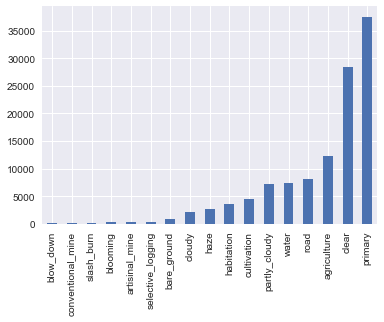

In [128]:
df_train[list(labels_set)].sum().sort_values().plot(kind='bar')

In [129]:
ordered_labels = df_train[list(labels_set)].sum().sort_values(ascending=False).index
type(ordered_labels)

pandas.core.indexes.base.Index

In [130]:
df_train[ordered_labels].corr()

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,1.000000,0.273743,0.115259,0.058937,0.032609,0.110213,0.092507,0.025513,0.064862,-0.829594,-0.076070,0.025879,0.010236,0.025570,0.020257,0.002535,0.013852
clear,0.273743,1.000000,0.058765,0.084686,0.041464,-0.718208,0.065897,0.097849,-0.410428,-0.358343,0.052982,0.040967,0.040851,0.046617,0.019757,-0.000257,0.017776
agriculture,0.115259,0.058765,1.000000,0.480930,0.063498,0.039743,0.344964,0.303979,-0.031978,-0.154252,-0.013854,-0.022616,-0.038379,-0.041082,0.041518,-0.006948,-0.008538
road,0.058937,0.084686,0.480930,1.000000,0.103498,-0.010596,0.079122,0.443341,-0.035642,-0.116412,0.064728,0.056375,0.028774,-0.038526,-0.004893,0.048653,-0.022068
water,0.032609,0.041464,0.063498,0.103498,1.000000,-0.005721,0.009845,0.054555,0.030541,-0.110432,0.021320,-0.009273,0.166084,-0.031718,-0.012714,0.009898,-0.019422
partly_cloudy,0.110213,-0.718208,0.039743,-0.010596,-0.005721,1.000000,-0.011306,-0.048390,-0.124914,-0.109062,-0.035959,-0.023980,-0.023888,-0.030380,-0.004034,0.013052,-0.005999
cultivation,0.092507,0.065897,0.344964,0.079122,0.009845,-0.011306,1.000000,0.134639,-0.030414,-0.082260,-0.003458,0.017603,-0.016849,-0.001502,0.113073,-0.011202,-0.004550
habitation,0.025513,0.097849,0.303979,0.443341,0.054555,-0.048390,0.134639,1.000000,-0.039675,-0.073547,0.050756,-0.016747,-0.001561,-0.024851,0.026567,0.046781,-0.010273
haze,0.064862,-0.410428,-0.031978,-0.035642,0.030541,-0.124914,-0.030414,-0.039675,1.000000,-0.062324,-0.011276,-0.019162,-0.019118,-0.019903,-0.015101,-0.009305,-0.013162
cloudy,-0.829594,-0.358343,-0.154252,-0.116412,-0.110432,-0.109062,-0.082260,-0.073547,-0.062324,1.000000,-0.034409,-0.021469,-0.021437,-0.021213,-0.016805,-0.011609,-0.011492


In [131]:
import seaborn as sns

In [132]:
df_occurence = df_train[ordered_labels].T.dot(df_train[ordered_labels])
df_occurence

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,37513,27668,11972,7728,7001,7175,4455,3469,2670,0,683,340,324,332,209,94,98
clear,27668,28431,9150,6295,5502,0,3527,3090,0,0,747,308,307,311,173,70,85
agriculture,11972,9150,12315,6034,2712,2493,3377,2737,672,0,225,65,38,32,119,24,22
road,7728,6295,6034,8071,2125,1382,1294,2786,394,0,323,151,110,10,36,59,2
water,7001,5502,2712,2125,7411,1295,868,915,613,0,206,49,299,16,24,26,3
partly_cloudy,7175,0,2493,1382,1295,7261,748,441,0,0,74,27,27,17,33,28,13
cultivation,4455,3527,3377,1294,868,748,4477,895,202,0,89,58,18,35,126,4,8
habitation,3469,3090,2737,2786,915,441,895,3660,129,0,163,13,29,4,41,36,3
haze,2670,0,672,394,613,0,202,129,2697,0,41,5,5,4,3,2,0
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


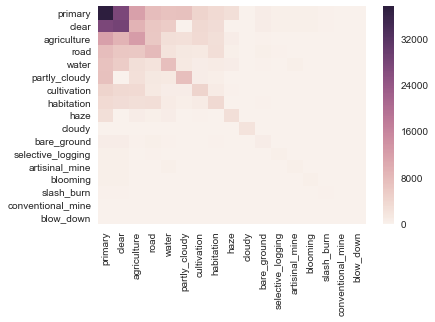

In [133]:
sns.heatmap(df_occurence)

In [134]:
df_percentage = df_train[ordered_labels].sum() / df_train[ordered_labels].count() * 100
df_percentage

primary              92.672744
clear                70.236419
agriculture          30.423182
road                 19.938734
water                18.308259
partly_cloudy        17.937696
cultivation          11.060056
habitation            9.041725
haze                  6.662714
cloudy                5.160701
bare_ground           2.129499
selective_logging     0.839942
artisinal_mine        0.837471
blooming              0.820178
slash_burn            0.516317
conventional_mine     0.247042
blow_down             0.242101
dtype: float64

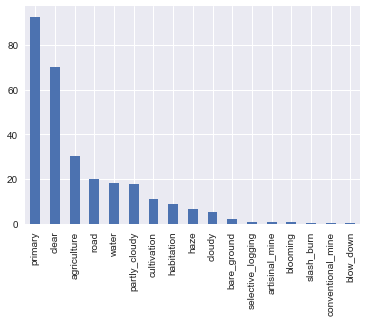

In [135]:
df_percentage.plot(kind='bar')

In [136]:
TRAIN_PATH = './data/train-jpg/'

In [137]:
import os

In [138]:
from PIL import Image
import random
import matplotlib.pyplot as plt

In [139]:
def plot_graph(label):

    images = df_train[df_train[label] == 1].image_name.values

    fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    ax = ax.flatten()

    for i in range(0,9):
        f = random.choice(images)
        img = Image.open(os.path.join(TRAIN_PATH, f + '.jpg'))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

Wall time: 366 ms


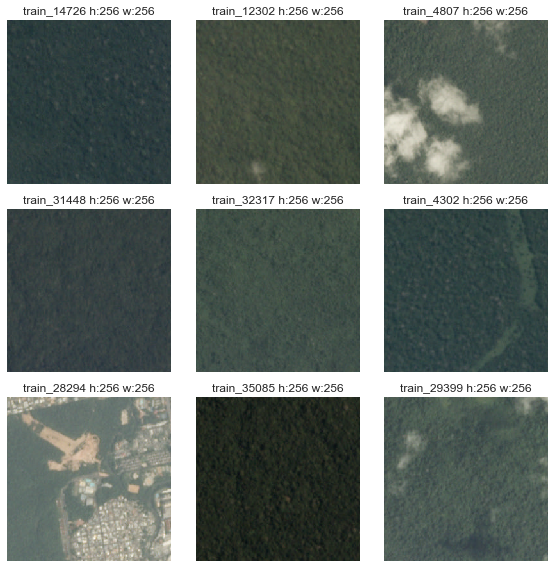

In [140]:
%time plot_graph('primary')

Wall time: 550 ms


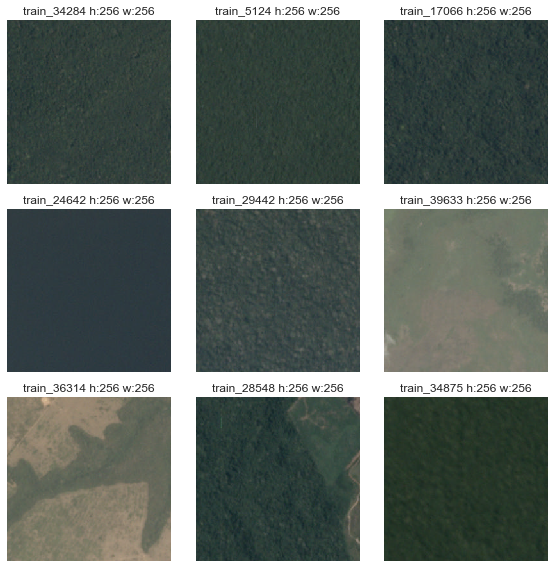

In [141]:
%time plot_graph('clear')

Wall time: 380 ms


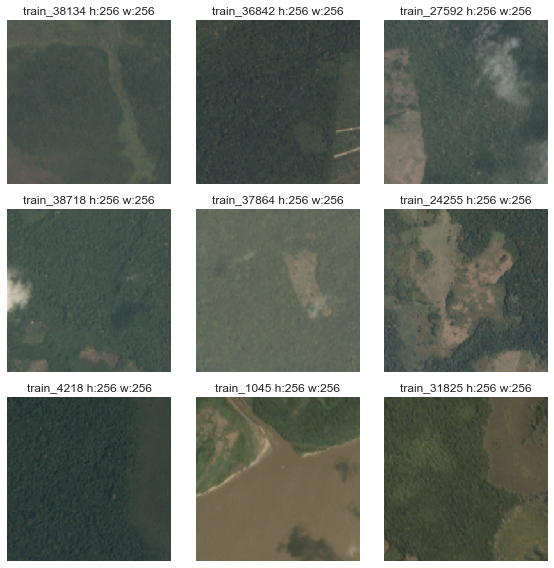

In [142]:
%time plot_graph('agriculture')

Wall time: 404 ms


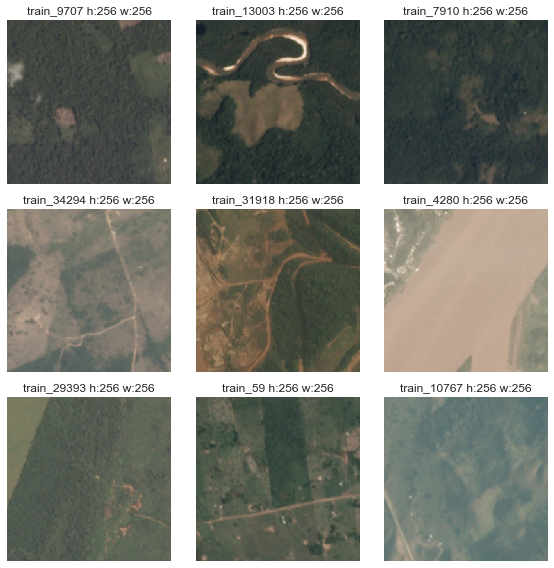

In [143]:
%time plot_graph('habitation')

In [144]:
%time df_train['image_name_w_ext'] = df_train.image_name.values + '.jpg'

Wall time: 5.52 ms


In [145]:
if not 'image_name_w_ext' in df_train.columns:
    %time df_train = df_train[['image_name', 'image_name_w_ext'] + list(df_train.columns.values[1:-1])]
df_train.head(10)

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water,image_name_w_ext
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,train_0.jpg
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,train_1.jpg
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,train_2.jpg
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,train_3.jpg
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,train_4.jpg
5,train_5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,train_5.jpg
6,train_6,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,train_6.jpg
7,train_7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,train_7.jpg
8,train_8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,train_8.jpg
9,train_9,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,train_9.jpg


In [146]:
for f in df_train.image_name_w_ext:
    if os.path.exists(os.path.join(TRAIN_PATH, f)) == False:
        print("%s is missing" % image_name)

In [147]:
%time shapes = [Image.open(os.path.join(TRAIN_PATH, f)).size for f in df_train.image_name_w_ext[:1000]]

Wall time: 266 ms


In [148]:
%time pd.Series(shapes).value_counts()

Wall time: 1 ms


(256, 256)    1000
dtype: int64

In [149]:
N_COLS = 32
N_ROWS = 32
N_CHANNELS = 3
MINI_BATCH_SIZE = 393
SHUFFLE = False
BATCH_SIZE = len(df_train)
NB_CATEGORIES = len(ordered_labels)
NB_EPOCHS = 1

In [150]:
y_enc = df_train[ordered_labels].values
y_enc

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [151]:
%time idx = np.random.permutation(len(df_train)) if SHUFFLE == True else np.linspace(start = 0,stop = BATCH_SIZE - 1, num = BATCH_SIZE, dtype=int)
idx

Wall time: 500 µs


array([    0,     1,     2, ..., 40476, 40477, 40478])

In [152]:
%time batches = np.array_split(idx, MINI_BATCH_SIZE)

Wall time: 502 µs


## Build Graph

In [153]:
import tensorflow as tf
print(tf.__version__)

1.1.0


In [154]:
tf.reset_default_graph()

In [181]:
config = tf.ConfigProto()

In [ ]:
config.log_device_placement = True

In [155]:
sess = tf.InteractiveSession(config=config)

In [156]:
X = tf.placeholder(dtype=tf.float32,shape=(None, 32,32,3), name="X")
y = tf.placeholder(dtype=tf.float32,shape=(None,17), name="y")

In [157]:
W_conv1 = tf.get_variable(name="W_conv1", shape=[5,5,3,32], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_conv1 = tf.get_variable(name="b_conv1", shape=[32], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_conv2 = tf.get_variable(name="W_conv2", shape=[5,5,32,64], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_conv2 = tf.get_variable(name="b_conv2", shape=[64], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_fc1 = tf.get_variable(name="W_fc1", shape=[8*8*64,1024], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_fc1 = tf.get_variable(name="b_fc1", shape=[1024], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_fc2 = tf.get_variable(name="W_fc2", shape=[1024, 17], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_fc2 = tf.get_variable(name="b_fc2", shape=[17], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [158]:
conv1 = tf.nn.conv2d(
    input=X,
    filter=W_conv1,
    strides=[1,1,1,1],
    padding='SAME',
    name='conv1'
) #256 * 256 * 64

relu1 = tf.nn.relu(
    features = conv1 + b_conv1,
    name='relu1'
) #256 * 256 * 64

pool1 = tf.nn.max_pool(
    value = relu1,
    ksize=[1,2,2,1],
    strides=[1,2,2,1],
    padding='SAME',
    name='pool1'
) #128 * 128 * 64

In [159]:
conv2 = tf.nn.conv2d(
    input=pool1,
    filter=W_conv2,
    strides=[1,1,1,1],
    padding='SAME',
    name='conv2'
) #128 * 128 *128

relu2 = tf.nn.relu(
    features = conv2 + b_conv2,
    name='relu2'
) #128 * 128 *128

pool2 = tf.nn.max_pool(
    value = relu2,
    ksize=[1,2,2,1],
    strides=[1,2,2,1],
    padding='SAME',
    name='pool2'
) #64 * 64 *128

In [160]:
pool_2_flat = tf.reshape(
    tensor=pool2,
    shape=(-1,8*8*64),
    name='pool_2-flat'
)

In [161]:
fc1 = tf.nn.relu(tf.matmul(pool_2_flat,W_fc1) + b_fc1)

In [162]:
#from tensorflow.contrib import learn

In [163]:
keep_prob = tf.placeholder(dtype=tf.float32, name="keep_prob")

In [164]:
dropout = tf.nn.dropout(
    x=fc1,
    keep_prob=keep_prob
)

In [165]:
fc2 = tf.matmul(dropout, W_fc2) + b_fc2 #1024 * 17

In [182]:
probabilities = tf.nn.sigmoid(fc2)

## Feed data

In [166]:
cross_entropy =  tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits= fc2)

In [167]:
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)

In [168]:
tf.add_to_collection(name='train_step', value=train_step)

In [169]:
import cv2

In [170]:
import datetime as dt
import os

In [171]:
saver = tf.train.Saver()

In [172]:
%time sess.run(tf.global_variables_initializer())

Wall time: 436 ms


In [173]:
for n in range(NB_EPOCHS):
    
    epoch_start_time = dt.datetime.now()
    
    for step,batch in enumerate(batches):
        batch_start_time = dt.datetime.now()
        
        images_names = df_train.loc[batch,:].image_name_w_ext
        images_names = images_names.apply(lambda x : os.path.join(TRAIN_PATH, x))
        
        
        images_list = [cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names]
        images_list = [cv2.resize(im, (32,32), interpolation = cv2.INTER_CUBIC) for im in images_list]
        images_array = np.asarray(images_list)
        
        images_array = images_array / 255
        
        model_name = 'mymodel_' + dt.datetime.now().strftime('%Y%m%d')
        
        train_step.run(feed_dict={
                X: images_array, 
                y: y_enc[batch,:],
                keep_prob: 0.5})
        
        if step%25 == 0:
            print ("epoch: %d step: %d accuracy: %g duration: %s nbImages: %d" % (n,step,train_accuracy,str(dt.datetime.now()-batch_start_time),images_names.size))
            saver.save(sess, os.path.join('./ckpt', model_name),global_step=step)
    
    saver.save(sess, os.path.join('./ckpt', 'mymodel_' + dt.datetime.now().strftime('%Y%m%d') + '_final.ckpt'))
        
    print("epoch: %d duration: %s" % (n, str(dt.datetime.now()-epoch_start_time)))

epoch: 0 step: 0 duration: 0:00:00.223569 nbImages: 103
epoch: 0 step: 25 duration: 0:00:00.203036 nbImages: 103
epoch: 0 step: 50 duration: 0:00:00.212066 nbImages: 103
epoch: 0 step: 75 duration: 0:00:00.222439 nbImages: 103
epoch: 0 step: 100 duration: 0:00:00.211062 nbImages: 103
epoch: 0 step: 125 duration: 0:00:00.198026 nbImages: 103
epoch: 0 step: 150 duration: 0:00:00.210052 nbImages: 103
epoch: 0 step: 175 duration: 0:00:00.212064 nbImages: 103
epoch: 0 step: 200 duration: 0:00:00.207259 nbImages: 103
epoch: 0 step: 225 duration: 0:00:00.216074 nbImages: 103
epoch: 0 step: 250 duration: 0:00:00.220587 nbImages: 103
epoch: 0 step: 275 duration: 0:00:00.212341 nbImages: 103
epoch: 0 step: 300 duration: 0:00:00.210515 nbImages: 103
epoch: 0 step: 325 duration: 0:00:00.209038 nbImages: 103
epoch: 0 step: 350 duration: 0:00:00.204042 nbImages: 103
epoch: 0 step: 375 duration: 0:00:00.207553 nbImages: 103
epoch: 0 duration: 0:01:39.423916


In [174]:
%time sess.run(tf.global_variables_initializer())

Wall time: 54.2 ms


In [241]:
NB_EPOCHS = 5

In [242]:
model_name = 'mymodel_' + dt.datetime.now().strftime('%Y%m%d') + '_final.ckpt'
%time saver = tf.train.import_meta_graph(meta_graph_or_file = os.path.join('./ckpt', model_name + '.meta'))
%time saver.restore(sess, os.path.join('./ckpt', model_name))

for n in range(NB_EPOCHS):
    
    epoch_start_time = dt.datetime.now()
    total_accuracy = 0
    
    for step,batch in enumerate(batches):
        batch_start_time = dt.datetime.now()
        
        images_names = df_train.loc[batch,:].image_name_w_ext
        images_names = images_names.apply(lambda x : os.path.join(TRAIN_PATH, x))
        
        images_list = [cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names]
        images_list = [cv2.resize(im, (32,32), interpolation = cv2.INTER_CUBIC) for im in images_list]
        images_array = np.asarray(images_list)
        
        images_array = images_array / 255
        
        train_step = tf.get_collection('train_step')[0]
        
        train_step.run(feed_dict={
                X: images_array, 
                y: y_enc[batch,:],
                keep_prob: 0.5})
        
        pred_vs_label = tf.cast(tf.equal(tf.round(probabilities), y), dtype=tf.float32)
          
        pred_vs_label_array = pred_vs_label.eval(feed_dict={
            X: images_array, 
            y: y_enc[batch,:],            
            keep_prob: 1})
        
        batch_accuracy = 0
        
        for arr in pred_vs_label_array:
            batch_accuracy += 1.0/pred_vs_label_array.shape[0] if False in arr  else 0 
            total_accuracy += 1.0/df_train.shape[0] if False in arr  else 0 
        
        if step%25 == 0:
            print ("epoch: %d step: %d total_acuracy: %g batch_accuracy: %g duration: %s nbImages: %d" % (n,step,total_accuracy,batch_accuracy,str(dt.datetime.now()-batch_start_time),images_names.size))
            
    print("epoch: %d total_accuracy: %g accuracy: %g duration: %s" % (n, total_accuracy,batch_accuracy, str(dt.datetime.now()-epoch_start_time)))

Wall time: 1.07 s
INFO:tensorflow:Restoring parameters from ./ckpt\mymodel_20170605_final.ckpt
Wall time: 458 ms
epoch: 0 step: 0 total_acuracy: 0.00123521 batch_accuracy: 0.485437 duration: 0:00:00.602551 nbImages: 103
epoch: 0 step: 25 total_acuracy: 0.0322142 batch_accuracy: 0.514563 duration: 0:00:00.570917 nbImages: 103
epoch: 0 step: 50 total_acuracy: 0.0629215 batch_accuracy: 0.572816 duration: 0:00:00.645555 nbImages: 103
epoch: 0 step: 75 total_acuracy: 0.0934065 batch_accuracy: 0.466019 duration: 0:00:00.638392 nbImages: 103
epoch: 0 step: 100 total_acuracy: 0.12441 batch_accuracy: 0.368932 duration: 0:00:00.754004 nbImages: 103
epoch: 0 step: 125 total_acuracy: 0.156007 batch_accuracy: 0.601942 duration: 0:00:00.657749 nbImages: 103
epoch: 0 step: 150 total_acuracy: 0.186368 batch_accuracy: 0.446602 duration: 0:00:00.572145 nbImages: 103
epoch: 0 step: 175 total_acuracy: 0.21715 batch_accuracy: 0.427184 duration: 0:00:00.593818 nbImages: 103
epoch: 0 step: 200 total_acuracy:

epoch: 4 step: 225 total_acuracy: 0.266212 batch_accuracy: 0.514563 duration: 0:00:00.756591 nbImages: 103
epoch: 4 step: 250 total_acuracy: 0.295783 batch_accuracy: 0.485437 duration: 0:00:00.703231 nbImages: 103
epoch: 4 step: 275 total_acuracy: 0.325156 batch_accuracy: 0.339806 duration: 0:00:00.850757 nbImages: 103
epoch: 4 step: 300 total_acuracy: 0.355147 batch_accuracy: 0.417476 duration: 0:00:00.734429 nbImages: 103
epoch: 4 step: 325 total_acuracy: 0.384792 batch_accuracy: 0.582524 duration: 0:00:00.750832 nbImages: 103
epoch: 4 step: 350 total_acuracy: 0.414042 batch_accuracy: 0.466019 duration: 0:00:00.752102 nbImages: 103
epoch: 4 step: 375 total_acuracy: 0.443045 batch_accuracy: 0.514563 duration: 0:00:00.736417 nbImages: 103
epoch: 4 total_accuracy: 0.463104 accuracy: 0.495146 duration: 0:04:57.656974
